# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [77]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd
import json
import matplotlib.pyplot as plt

f = open('/content/yearinfo.json')
yeardata = json.load(f)
print(yeardata)

{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [78]:
#checking number of year range
yeardata.keys()

dict_keys(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])

In [79]:
#finding number of songs per year
len(yeardata['2019'])

100

In [80]:
#column names
yeardata['2019'][0].keys()

dict_keys(['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url'])

In [81]:
#checking value format stored 
yeardata['2019'][0].values()

dict_values([['Lil Nas X', 'Billy Ray Cyrus'], ['/wiki/Old_Town_Road'], ['Old Town Road'], 1, '"Old Town Road"', ['/wiki/Lil_Nas_X', '/wiki/Billy_Ray_Cyrus']])

In [82]:
#creating column for dataframe
column = list(yeardata['2019'][0].keys())+(['year'])
column

['band_singer', 'song', 'songurl', 'ranking', 'titletext', 'url', 'year']

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [83]:
#write your code here
#update all the data point in the data_list
data_list = []
for key, value in yeardata.items():
    for i in value:
        temp = list(i.values())+[key]
        data_list.append(temp)


In [84]:
#create dataframe
df = pd.DataFrame(data_list,columns=column)

In [85]:
#printing the first 5 data
df.head()

,band_singer,song,songurl,ranking,titletext,url,year
0,[Kesha],[/wiki/Tik_Tok_(song)],[Tik Tok (song)],1,"""Tik Tok""",[/wiki/Kesha],2010
1,[Lady Antebellum],[/wiki/Need_You_Now_(Lady_Antebellum_song)],[Need You Now (Lady Antebellum song)],2,"""Need You Now""",[/wiki/Lady_Antebellum],2010
2,[Train (band)],"[/wiki/Hey,_Soul_Sister]","[Hey, Soul Sister]",3,"""Hey, Soul Sister""",[/wiki/Train_(band)],2010
3,"[Katy Perry, Snoop Dogg]",[/wiki/California_Gurls],[California Gurls],4,"""California Gurls""","[/wiki/Katy_Perry, /wiki/Snoop_Dogg]",2010
4,"[Usher (musician), Will.i.am]",[/wiki/OMG_(Usher_song)],[OMG (Usher song)],5,"""OMG""","[/wiki/Usher_(musician), /wiki/Will.i.am]",2010


In [86]:
#trying to fetch the data point [0][0]
df.band_singer[0][0]

'Kesha'

In [87]:
#checking the datatype
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [88]:
#printing the first 5 data 
df.head()

,band_singer,song,songurl,ranking,titletext,url,year
0,[Kesha],[/wiki/Tik_Tok_(song)],[Tik Tok (song)],1,"""Tik Tok""",[/wiki/Kesha],2010
1,[Lady Antebellum],[/wiki/Need_You_Now_(Lady_Antebellum_song)],[Need You Now (Lady Antebellum song)],2,"""Need You Now""",[/wiki/Lady_Antebellum],2010
2,[Train (band)],"[/wiki/Hey,_Soul_Sister]","[Hey, Soul Sister]",3,"""Hey, Soul Sister""",[/wiki/Train_(band)],2010
3,"[Katy Perry, Snoop Dogg]",[/wiki/California_Gurls],[California Gurls],4,"""California Gurls""","[/wiki/Katy_Perry, /wiki/Snoop_Dogg]",2010
4,"[Usher (musician), Will.i.am]",[/wiki/OMG_(Usher_song)],[OMG (Usher song)],5,"""OMG""","[/wiki/Usher_(musician), /wiki/Will.i.am]",2010


In [89]:
df

,band_singer,song,songurl,ranking,titletext,url,year
0,[Kesha],[/wiki/Tik_Tok_(song)],[Tik Tok (song)],1,"""Tik Tok""",[/wiki/Kesha],2010
1,[Lady Antebellum],[/wiki/Need_You_Now_(Lady_Antebellum_song)],[Need You Now (Lady Antebellum song)],2,"""Need You Now""",[/wiki/Lady_Antebellum],2010
2,[Train (band)],"[/wiki/Hey,_Soul_Sister]","[Hey, Soul Sister]",3,"""Hey, Soul Sister""",[/wiki/Train_(band)],2010
3,"[Katy Perry, Snoop Dogg]",[/wiki/California_Gurls],[California Gurls],4,"""California Gurls""","[/wiki/Katy_Perry, /wiki/Snoop_Dogg]",2010
4,"[Usher (musician), Will.i.am]",[/wiki/OMG_(Usher_song)],[OMG (Usher song)],5,"""OMG""","[/wiki/Usher_(musician), /wiki/Will.i.am]",2010
...,...,...,...,...,...,...,...
1195,[Lainey Wilson],[/wiki/Things_a_Man_Oughta_Know],[Things a Man Oughta Know],96,"""Things a Man Oughta Know""",[/wiki/Lainey_Wilson],2021
1196,[BRS Kash],[/wiki/Throat_Baby_(Go_Baby)],[Throat Baby (Go Baby)],97,"""Throat Baby (Go Baby)""",[/wiki/BRS_Kash],2021
1197,[Rod Wave],[/wiki/Tombstone_(song)],[Tombstone (song)],98,"""Tombstone""",[/wiki/Rod_Wave],2021
1198,"[Chase Rice, Florida Georgia Line]",[/wiki/Drinkin%27_Beer._Talkin%27_God._Amen.],[Drinkin' Beer. Talkin' God. Amen.],99,"""Drinkin' Beer. Talkin' God. Amen.""","[/wiki/Chase_Rice, /wiki/Florida_Georgia_Line]",2021


In [90]:
#its a function to enter the datapoint in the formated value in the dataset
def fetch_list_value(list_name):
    value = list_name[0]
    return value

#datapoints which need to be entered in proper formated value
df['band_singer'] = df.band_singer.map(fetch_list_value)

In [91]:
#printing the first 5 data by default with the paremeter 
df.head()

,band_singer,song,songurl,ranking,titletext,url,year
0,Kesha,[/wiki/Tik_Tok_(song)],[Tik Tok (song)],1,"""Tik Tok""",[/wiki/Kesha],2010
1,Lady Antebellum,[/wiki/Need_You_Now_(Lady_Antebellum_song)],[Need You Now (Lady Antebellum song)],2,"""Need You Now""",[/wiki/Lady_Antebellum],2010
2,Train (band),"[/wiki/Hey,_Soul_Sister]","[Hey, Soul Sister]",3,"""Hey, Soul Sister""",[/wiki/Train_(band)],2010
3,Katy Perry,[/wiki/California_Gurls],[California Gurls],4,"""California Gurls""","[/wiki/Katy_Perry, /wiki/Snoop_Dogg]",2010
4,Usher (musician),[/wiki/OMG_(Usher_song)],[OMG (Usher song)],5,"""OMG""","[/wiki/Usher_(musician), /wiki/Will.i.am]",2010


### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [92]:
#singers with more than 15 times of apperance
df.value_counts(subset=['band_singer']).loc[lambda x:x > 15]

band_singer     
Drake (musician)    26
Maroon 5            21
Rihanna             21
Ariana Grande       20
Taylor Swift        19
The Weeknd          16
dtype: int64

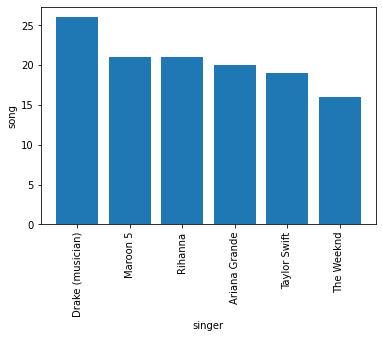

In [98]:
#Write your program and plot bar graph
y = df.band_singer.value_counts().loc[lambda x:x > 15]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('song')
plt.show()

**Question: Who is the most profilic singer?**



Drake appered for 26 times which concludes that he is the most profilic singer.

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [94]:
#write your code here
#adding score column and datapoint to df
df['score'] = [101-i for i in df['ranking']]
df.head()

,band_singer,song,songurl,ranking,titletext,url,year,score
0,Kesha,[/wiki/Tik_Tok_(song)],[Tik Tok (song)],1,"""Tik Tok""",[/wiki/Kesha],2010,100
1,Lady Antebellum,[/wiki/Need_You_Now_(Lady_Antebellum_song)],[Need You Now (Lady Antebellum song)],2,"""Need You Now""",[/wiki/Lady_Antebellum],2010,99
2,Train (band),"[/wiki/Hey,_Soul_Sister]","[Hey, Soul Sister]",3,"""Hey, Soul Sister""",[/wiki/Train_(band)],2010,98
3,Katy Perry,[/wiki/California_Gurls],[California Gurls],4,"""California Gurls""","[/wiki/Katy_Perry, /wiki/Snoop_Dogg]",2010,97
4,Usher (musician),[/wiki/OMG_(Usher_song)],[OMG (Usher song)],5,"""OMG""","[/wiki/Usher_(musician), /wiki/Will.i.am]",2010,96


In [100]:
#adding the total score of the singer along with the singer count
#name to the diss_sing and converting it into the series
#for easy of labeling x and y value
#df.groupby('band_singer').sum() other solution

diss_sing = {}

for singer, songs in df.groupby('band_singer'):
    diss_sing[singer] = songs.score.sum()

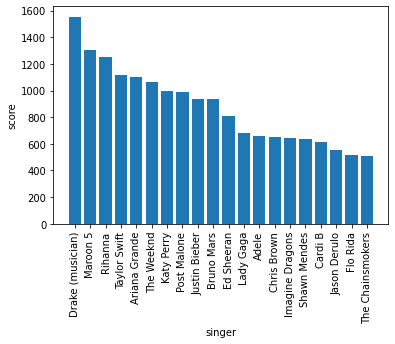

In [101]:
#ploting the graph
y = pd.Series(data=diss_sing.values(), index=diss_sing.keys()).sort_values(ascending=False)[:20]
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('singer')
plt.ylabel('score')
plt.show()

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

Yes, there is a difference in position, as the singer's name has shifted from 4th to 5th place. It happened because the number in the first graph label was based on the number of times the singer's name appeared, whereas the number in the second graph label was based on the singer's total score.

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

Which singer of what song got highest ranked in each year?

In [110]:
#write your solution from here
# singer's best songs acording to the ranking

bgroup_score = df.groupby('band_singer')
#for key,value in broup_score.items():
temp = bgroup_score.get_group('Adele')
s = [j for j in temp['ranking']]
ind = [ i[1:-1] for i in temp['titletext']]

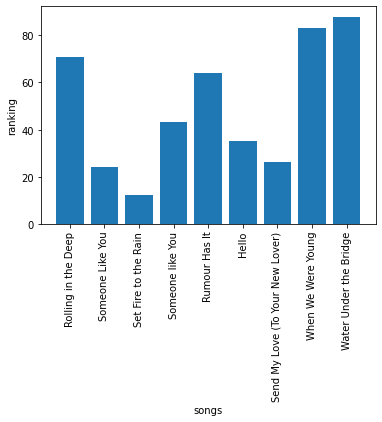

In [111]:
y = pd.Series(data=s, index=ind)
x = y.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('songs')
plt.ylabel('ranking')
plt.show()



## SUBMISSION DATE: 2nd April 2022 